In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preparando os dados

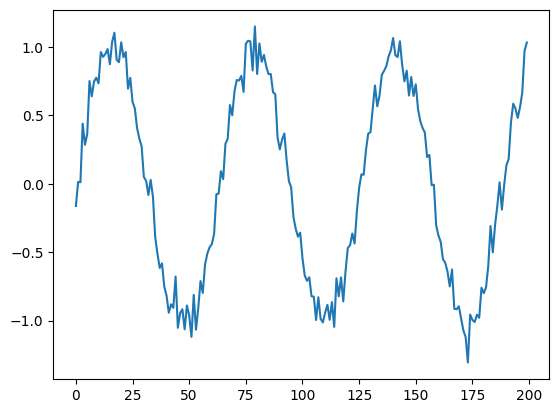

In [ ]:
series = np.sin(np.arange(200) / 10) + np.random.randn(200) / 10

plt.plot(series)
plt.show()

In [ ]:
T = 10
X = []
Y = []

for i in range(len(series) - T):
  X.append(series[i:i+T])
  Y.append(series[i+T])

X = np.array(X)
Y = np.array(Y)
N = len(X)
print("X_shape: ", X.shape, "\nY_shape: ", Y.shape)

X_shape:  (190, 10) 
Y_shape:  (190,)


# Modelo



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(T,))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='Adam', loss='mse')

In [ ]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - loss: 0.6006 - val_loss: 0.5936
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6053 - val_loss: 0.5682
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5778 - val_loss: 0.5437
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5368 - val_loss: 0.5201
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4982 - val_loss: 0.4975
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4825 - val_loss: 0.4757
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4844 - val_loss: 0.4548
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4475 - val_loss: 0.4349
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4465 - val_loss: 0.4159
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4148 - val_loss: 0.3978
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3992 - val_loss: 0.3808
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3656 - val_loss: 0.3647


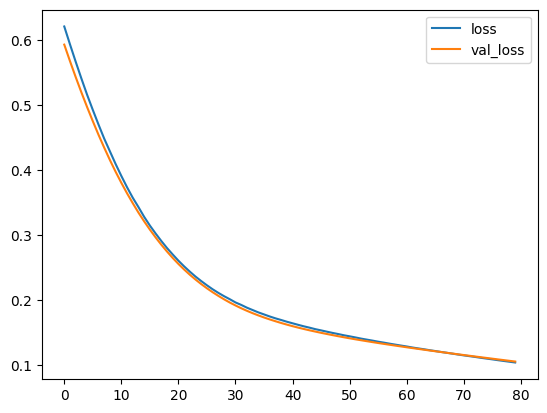

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] # validation set

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

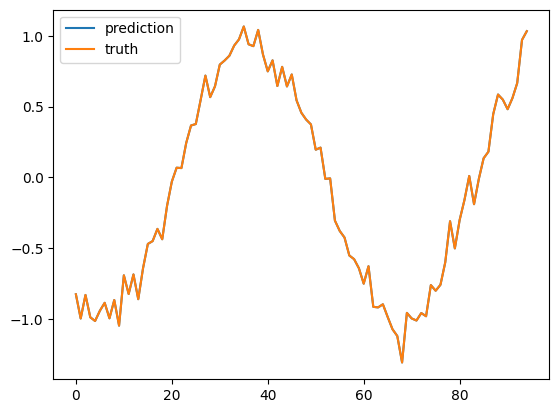

In [ ]:
plt.plot(validation_target, label='prediction')
plt.plot(Y[-N//2:], label='truth')
plt.legend()
plt.show()